# 讀標註完的

8 8
{'id': '0059', 'mask': [[[21, 15], [20, 16], [20, 27], [21, 28], [21, 29], [22, 30], [22, 31], [23, 32], [24, 32], [26, 34], [28, 34], [29, 35], [30, 35], [31, 36], [36, 36], [36, 35], [37, 34], [37, 33], [36, 32], [36, 25], [35, 24], [35, 23], [30, 18], [29, 18], [28, 17], [27, 17], [26, 16], [25, 16], [24, 15]], [[38, 20], [37, 21], [37, 31], [38, 32], [38, 39], [43, 44], [46, 44], [47, 45], [48, 45], [49, 44], [50, 44], [50, 32], [49, 31], [49, 30], [45, 26], [45, 25], [43, 23], [42, 23], [40, 21], [39, 21]], [[54, 17], [53, 18], [53, 24], [52, 25], [52, 27], [51, 28], [51, 39], [52, 40], [52, 45], [53, 46], [53, 47], [56, 50], [57, 50], [58, 51], [60, 51], [61, 52], [62, 51], [64, 51], [65, 50], [66, 50], [67, 49], [69, 49], [69, 48], [70, 47], [70, 44], [69, 43], [69, 39], [68, 38], [68, 36], [67, 35], [67, 34], [66, 33], [66, 32], [64, 30], [64, 29], [62, 27], [62, 26], [60, 24], [60, 23], [57, 20], [57, 19], [55, 17]], [[70, 20], [70, 25], [71, 26], [71, 47], [72, 48], [72, 

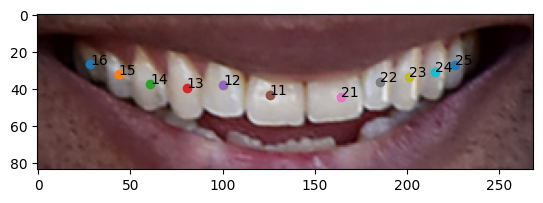

In [2]:
from os import listdir
from os.path import isfile, isdir, join
import json 
from pathlib import Path
import matplotlib.pyplot as plt
import io
import cv2
import numpy as np 


Dir_path=Path('./app/TrainData/labeled')
files = listdir(str(Dir_path/'image'))

all_path=[]
all_mask_path=[]
for f in files:
    f=Path(f)
    if f.suffix!='.png':
        print(f)
        continue

    fullpath=Dir_path/'image'/f
    maskpath=Dir_path/'mask'/f'{f.stem}.json'

    all_path.append(str(fullpath.resolve()))
    all_mask_path.append(str(maskpath.resolve()))

    
        
print(len(all_path) ,len(all_mask_path))

all_mask=[]
for path,maskpath in zip(all_path,all_mask_path):
    fig=cv2.imread(path)
    
    with open(maskpath) as f:
        data=json.load(f)
    print(data)
    all_mask.append(data)
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    for i in range(len(data['mask'])):
        mask=np.array(data['mask'][i])
        if data['label'][i]!=-1:
            plt.text(np.mean(mask[:,0]), np.mean(mask[:,1]), data['label'][i])
            plt.scatter(np.mean(mask[:,0]), np.mean(mask[:,1]))

    break

# 產生CoCo資料格式

In [2]:
from BuildCoCoDataset import BuildCoCoDataset

BuildCoCoDataset()

## 驗證CoCo

{'name': '0111.png', 'anns': [[56, 14, 18, 31, 3], [75, 18, 22, 28, 2], [97, 25, 31, 28, 1], [130, 30, 34, 24, 5], [166, 29, 19, 19, 6], [188, 30, 20, 17, 7], [210, 29, 13, 13, 8]]}


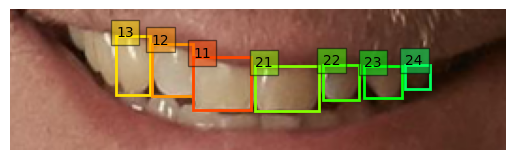

In [3]:
import json
import os
import random as rd
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()


def load_img_ann(ann_path=str(Dir_path/"train.json")):
    """return [{img_name, [ (x, y, h, w, label), ... ]}]"""
    with open(ann_path) as fp:
        root = json.load(fp)
    img_dict = {}
    for img_info in root['images']:
        img_dict[img_info['id']] = {'name': img_info['file_name'], 'anns': []}
    for ann_info in root['annotations']:
        img_dict[ann_info['image_id']]['anns'].append(
            ann_info['bbox'] + [ann_info['category_id']])
        
    cate_dict={}

    for cate in root["categories"]:
        cate_dict[cate["id"]]=cate["name"]

    return img_dict, cate_dict


def show_img_ann(img_info,cate_dict):
    from PIL import Image
    #from dldemos.nms.show_bbox import draw_bbox
    print(img_info)

    """with open(str(Dir_path/"train.json")) as fp:
        root = json.load(fp)
    categories = root['categories']
    category_dict = {int(c['id']): c['name'] for c in categories}
"""
    img_path = Dir_path/"image"/img_info['name']
    img = Image.open(img_path)

    currentAxis = plt.gca()
    currentAxis.axis('off')

    plt.imshow(img)
    for ann in img_info['anns']:
        x, y, w, h, c = ann
        x1, y1, x2, y2 = x, y, x + w, y + h
        #draw_bbox(img, (x1, y1, x2, y2), 1.0, text=category_dict[ann[4]])
        currentAxis.add_patch(plt.Rectangle((x,y),w,h,
                                            fill=False,
                                            edgecolor=colors[c],
                                            linewidth=2))
        currentAxis.text(x, y, cate_dict[c],
                         bbox={'facecolor': colors[c], 'alpha': 0.5})

    #img.save('work_dirs/tmp.jpg')



    plt.show()



img_dict, cate_dict = load_img_ann()
keys = list(img_dict.keys())
show_img_ann(img_dict[rd.choice(keys)],cate_dict)

#

In [6]:
! python SOLO/tools/train.py SOLO/configs/solov2/solov2_light_448_r18_fpn_8gpu_3x.py

Traceback (most recent call last):
  File "c:\gits\SMILE\SOLO\tools\train.py", line 7, in <module>
    import mmcv
ModuleNotFoundError: No module named 'mmcv'


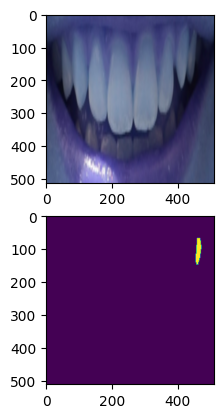

In [82]:
from app.lib.Polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np
ann_path=str(Dir_path/"train.json")
img_path={}


x_data=[]
y_data=[]


with open(ann_path) as fp:
    root = json.load(fp)

for img in root["images"]:
    img_path[img['id']]=str(Dir_path/"image"/img['file_name'])

for ann in root["annotations"]:
    mask_pol=Polygon(np.array(ann['segmentation']).reshape(-1,2))
    img= cv2.imread(img_path[ann['image_id']])
    h,w,d=img.shape
    img=cv2.resize(img,(512,512) )
    plt.subplot(211)
    plt.imshow(img)
    x=np.array(img)
    

    
    mask=np.zeros([h,w], np.uint8)
    try:
        cv2.fillPoly(mask,[mask_pol.points],1)
    except:
        print("can't fill",mask_pol.points)

    mask = Image.fromarray(mask)
    mask= mask.resize((512,512))
    plt.subplot(212)
    plt.imshow(mask)
    mask=np.array(mask)
    mask=np.expand_dims(mask,axis=-1)

    x=np.concatenate((x,mask),axis=2 )



    y_data.append(ann['category_id'])
    x_data.append(x)

    

In [83]:
x_data,y_data


([array([[[44, 48, 72,  0],
          [44, 48, 72,  0],
          [45, 49, 74,  0],
          ...,
          [48, 50, 75,  0],
          [47, 50, 74,  0],
          [47, 50, 73,  0]],
  
         [[44, 48, 72,  0],
          [44, 48, 72,  0],
          [45, 49, 73,  0],
          ...,
          [48, 50, 75,  0],
          [47, 50, 74,  0],
          [47, 50, 73,  0]],
  
         [[44, 48, 72,  0],
          [44, 48, 73,  0],
          [45, 49, 74,  0],
          ...,
          [48, 50, 75,  0],
          [47, 50, 74,  0],
          [47, 50, 73,  0]],
  
         ...,
  
         [[52, 56, 83,  0],
          [52, 56, 84,  0],
          [52, 57, 85,  0],
          ...,
          [62, 62, 78,  0],
          [60, 60, 76,  0],
          [60, 60, 75,  0]],
  
         [[52, 56, 83,  0],
          [52, 56, 83,  0],
          [52, 57, 84,  0],
          ...,
          [61, 61, 78,  0],
          [60, 60, 76,  0],
          [60, 60, 75,  0]],
  
         [[52, 56, 83,  0],
          [52, 56, 8